https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
y_pd = df['MEDV']
X_pd = df.drop(['MEDV'], axis=1)

In [4]:
scaler = StandardScaler()
X_sc = pd.DataFrame(scaler.fit_transform(X_pd), columns=X_pd.columns)
X_np = X_sc.to_numpy()
y_np = y_pd.to_numpy()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [7]:
y_train.shape = (y_train.shape[0], 1)
y_test.shape = (y_test.shape[0], 1)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

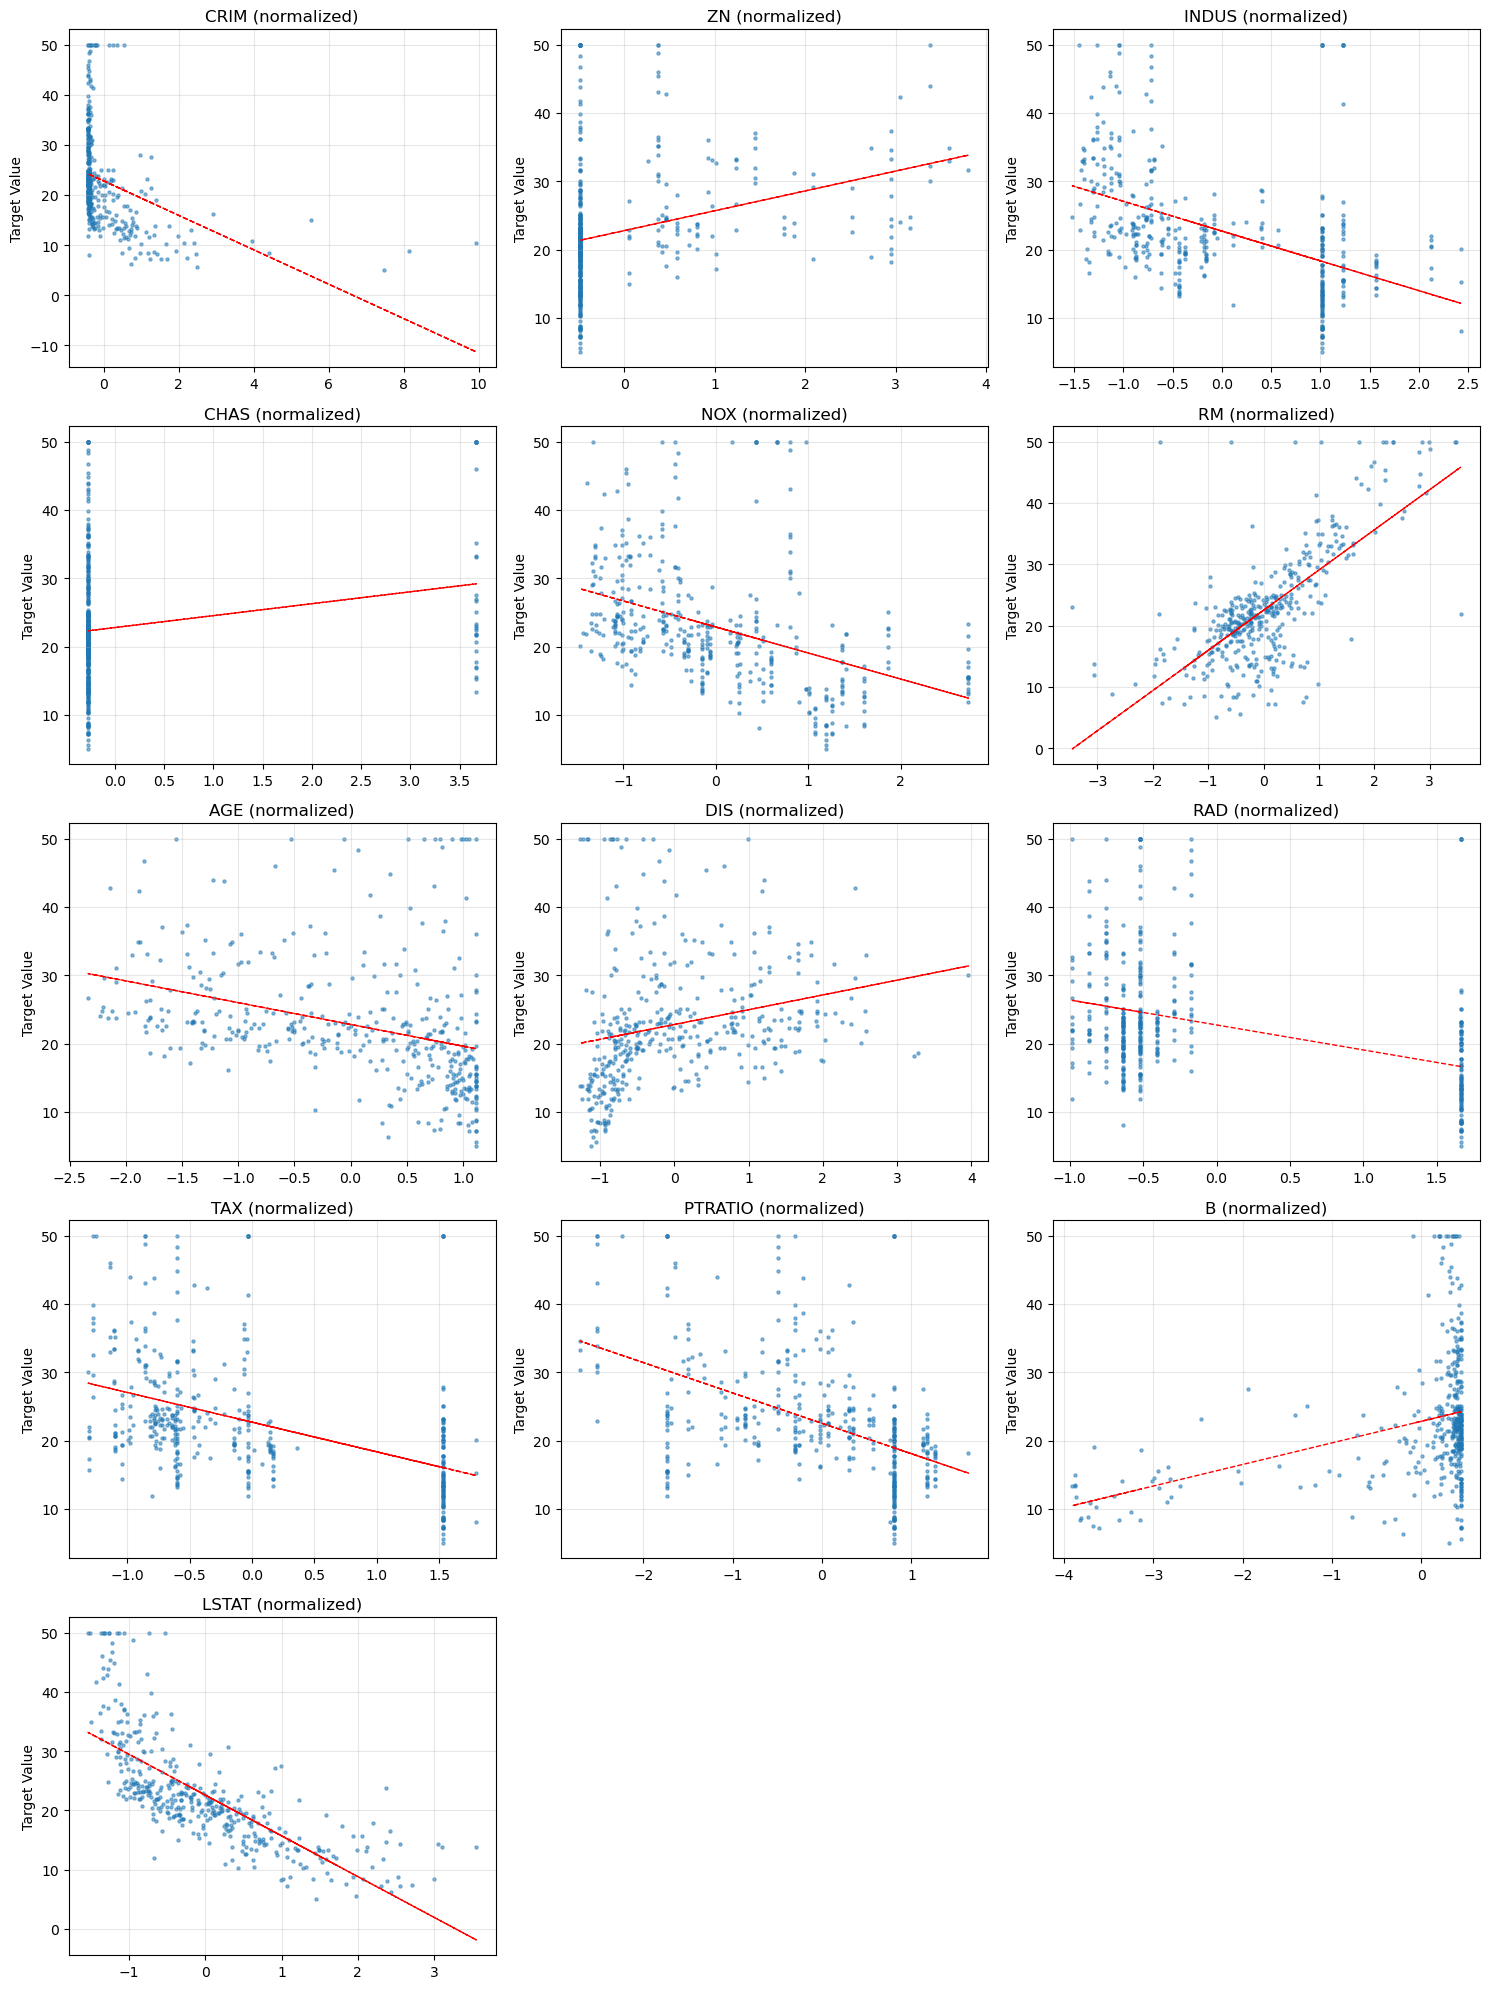

In [9]:
# Создание графиков после стандартизации
plt.figure(figsize=(15, 20))

# Для каждого признака
for i in range(X_train.shape[1]):
    plt.subplot(5, 3, i+1)
    
    feature = X_train[:, i]
    target = y_train
    
    # Построение графика
    plt.scatter(feature, target, s=5, alpha=0.5)
    plt.title(f'{column_names[i]} (normalized)')
    plt.ylabel('Target Value')
    plt.grid(True, alpha=0.3)
    
    # Линия регрессии
    slope, intercept = np.polyfit(feature, target, 1)
    plt.plot(feature, intercept + slope*feature, 
             color='red', 
             linewidth=1,
             linestyle='--')

plt.tight_layout()
plt.show()

In [10]:
import torch
import torch.nn as nn

# Определение модели
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # пропускаем данные через слои нс
    # вызывается автоматически в model(X_train)
    def forward(self, x):
        out = self.linear(x)
        return out


# Преобразование данных в тензоры PyTorch
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

# Определение гиперпараметров
input_size = X_train.shape[1]  # Размерность входных признаков
output_size = 1          # Размерность выхода (одна целевая переменная)
learning_rate = 0.1     # Скорость обучения
num_epochs = 100         # Количество эпох

# Создание экземпляра модели
model = LinearRegression(input_size, output_size)

# Определение функции потерь и оптимизатора
# определяет функцию потерь (MSELoss)
criterion = nn.MSELoss()
# создает оптимизатор (SGD), который будет обновлять параметры модели
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Цикл обучения
for epoch in range(num_epochs):
    
    # Forward pass (прямое распространение)
    
    # получает предсказанные значения
    outputs = model(X_train)
    # вычисляет значение функции потерь между outputs и y_train
    loss = criterion(outputs, y_train)

    # Backward pass и оптимизация
    
    # обнуляет градиенты параметров модели перед backward.
    optimizer.zero_grad()
    # вычисляет градиенты функции потерь по параметрам модели.
    loss.backward()
    # обновляет параметры модели, используя градиенты
    optimizer.step()

    # Вывод промежуточной информации
    if (epoch + 1) % 10 == 0:
        print(f'Эпоха [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Вывод результатов
print('Параметры модели:')
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'{name}: {param.data.numpy()}')

Эпоха [10/100], Loss: 33.0124
Эпоха [20/100], Loss: 22.8255
Эпоха [30/100], Loss: 22.2660
Эпоха [40/100], Loss: 22.0320
Эпоха [50/100], Loss: 21.9001
Эпоха [60/100], Loss: 21.8208
Эпоха [70/100], Loss: 21.7704
Эпоха [80/100], Loss: 21.7366
Эпоха [90/100], Loss: 21.7130
Эпоха [100/100], Loss: 21.6959
Параметры модели:
linear.weight: [[-0.91984713  0.58316123  0.08433244  0.7334526  -1.8950027   3.1742177
  -0.19572762 -2.954229    1.6884001  -1.1566464  -1.9496808   1.1256633
  -3.6050787 ]]
linear.bias: [22.481895]


In [11]:
with torch.no_grad():
    predicted = model(X_test).detach().numpy()

In [12]:
def calculate_mse(predicted, actual):

    assert len(predicted) == len(actual), "Длины массивов должны быть одинаковыми."

    # Вычисление суммы квадратов разностей
    squared_errors = np.square(predicted - actual)
    sum_squared_errors = np.sum(squared_errors)

    # Вычисление MSE
    mse = sum_squared_errors / len(predicted)

    return mse

In [13]:
mse = calculate_mse(predicted, y_test.numpy())
print("TEST MSE:", mse)

TEST MSE: 24.720719879748774
